## video to img

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

In [7]:

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
# import cv2
# cap = cv2.VideoCapture('./datasets/coca_cola.mp4') #동영상 불러오기
# num = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame = cv2.flip(frame, -1)
#     if ret:
#         cv2.imshow('frame', frame)
#         #이미지의 각 이름을 자동으로 지정
#         path = './coca_cola_250_' + str(num) + '.jpg'
#         cv2.imwrite(path, frame) #영상 -> 이미지로 저장
#         key = cv2.waitKey(25)
#         if key == 27: # Esc
#             break
#     num += 1
# cap.release()
# cv2.destroyAllWindows()

In [4]:
# import cv2
# video = cv2.VideoCapture('./datasets/coca_cola.mp4')
# width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
# height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
# count = video.get(cv2.CAP_PROP_FRAME_COUNT)
# fps = video.get(cv2.CAP_PROP_FPS)
# print('가로: ', str(width))
# print('세로: ', str(height))
# print('총 프레임수: ', str(count))
# print('FPS: ' + str(fps))

## rename images

In [5]:
# # 사진 이름 한번에 바꾸기(주의! 순서가 랜덤으로 들어온다)

# import os

# file_path = './datasets/Coke' # 바꿔야하는 이미지가 들어있는 파일
# file_names = os.listdir(file_path)

# num = 1
# for name in file_names:
#     src = os.path.join(file_path, name)
#     dst = 'coca_cola_250_' + str(num) + '.jpg' # 바꿀 이름
#     dst = os.path.join(file_path, dst)
#     os.rename(src, dst)
#     num += 1

## load img

In [8]:
path = '/Users/iseung-won/Desktop/mini_project_classifying_drink/non_object/' # folder path
os.chdir(path) # move to the folder
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
no_object_imgs = []
for file in files:
    if '.jpg' in file: 
        src = cv2.imread(file)
        f = cv2.resize(src , (224, 224)) # resize img
        no_object_imgs.append(f)
np.array(no_object_imgs).shape

(2208, 224, 224, 3)

In [9]:
img_list = ['coca_cola_250', 'coca_cola_350', 'pepsi_250', 'pepsi_355', 'pepsi_zero_355', 'pepsi_zero_500','pocari_240', 
            'pocari_620', 'coca_cola_zero_250', 'coca_cola_zero_355', 'chilsung250', 'chilsung355', 'sprite_250', 'sprite_355', ]

In [8]:
for i in range(len(img_list)):
    path = f'C:/Users/Project/datasets/{img_list[i]}' # folder path
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    globals()[f'{img_list[i]}_imgs'] = []
    for file in files:
        if '.jpg' in file: 
            src = cv2.imread(file)
            f = cv2.resize(src , (224, 224)) # resize img
            globals()[f'{img_list[i]}_imgs'].append(f)
    print(img_list[i], np.array(globals()[f'{img_list[i]}_imgs']).shape)

coca_cola_250 (488, 224, 224, 3)
coca_cola_350 (701, 224, 224, 3)
pepsi_250 (1601, 224, 224, 3)
pepsi_355 (921, 224, 224, 3)
pepsi_zero_355 (1668, 224, 224, 3)
pepsi_zero_500 (486, 224, 224, 3)
pocari_240 (1500, 224, 224, 3)
pocari_620 (1507, 224, 224, 3)
coca_cola_zero_250 (552, 224, 224, 3)
coca_cola_zero_355 (769, 224, 224, 3)
chilsung250 (600, 224, 224, 3)
chilsung355 (600, 224, 224, 3)
sprite_250 (1055, 224, 224, 3)
sprite_355 (855, 224, 224, 3)


## XML to CSV

In [10]:
# XML to CSV
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse
def xml_to_csv(path):
  xml_list = []
  for xml_file in glob.glob(path + '/*.xml'):
      tree = ET.parse(xml_file)
      root = tree.getroot()
      filename = root.find('filename').text
      width = int(root.find('size').find('width').text)
      height = int(root.find('size').find('height').text)
      for member in root.findall('object'):
          bndbox = member.find('bndbox')
          value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
          xml_list.append(value)
  column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  return xml_df

In [11]:
for i in range(len(img_list)):
    path = f'/Users/iseung-won/Desktop/mini_project_classifying_drink/{img_list[i]}' # folder path
    globals()[f'{img_list[i]}_info'] = xml_to_csv(path)
    print(img_list[i], globals()[f'{img_list[i]}_info'].shape)

coca_cola_250 (488, 8)
coca_cola_350 (701, 8)
pepsi_250 (680, 8)
pepsi_355 (921, 8)
pepsi_zero_355 (1668, 8)
pepsi_zero_500 (486, 8)
pocari_240 (1500, 8)
pocari_620 (1507, 8)
coca_cola_zero_250 (552, 8)
coca_cola_zero_355 (769, 8)
chilsung250 (600, 8)
chilsung355 (600, 8)
sprite_250 (1055, 8)
sprite_355 (855, 8)


## Preprocessing

In [12]:
for i in range(len(img_list)):
    globals()[f'{img_list[i]}_info_df'] = globals()[f'{img_list[i]}_info'].copy()
    globals()[f'{img_list[i]}_info_df']['class'] = i+1

In [13]:
info_df = pd.concat([globals()[f'{img_list[i]}_info_df'][:486] for i in range(len(img_list))])
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_102.jpg,3024,4032,1,152,893,2277,4032
1,coca_cola_250_116.jpg,3024,4032,1,37,53,2197,4032
2,coca_cola_250_300.jpg,1080,1920,1,265,622,739,1570
3,coca_cola_250_466.jpg,1080,1920,1,356,603,772,1453
4,coca_cola_250_472.jpg,1080,1920,1,341,615,780,1492
...,...,...,...,...,...,...,...,...
481,sprite355_774.jpg,720,960,14,222,200,537,819
482,sprite355_748.jpg,720,960,14,16,261,609,826
483,sprite355_172.jpg,720,960,14,61,138,436,827
484,sprite355_614.jpg,720,960,14,149,336,438,839


In [14]:
info_df['xmin'] = round(info_df['xmin'] / (info_df['width']/224))
info_df['xmax'] = round(info_df['xmax'] / (info_df['width']/224))
info_df['ymin'] = round(info_df['ymin'] / (info_df['height']/224))
info_df['ymax'] = round(info_df['ymax'] / (info_df['height']/224))
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0
1,coca_cola_250_116.jpg,3024,4032,1,3.0,3.0,163.0,224.0
2,coca_cola_250_300.jpg,1080,1920,1,55.0,73.0,153.0,183.0
3,coca_cola_250_466.jpg,1080,1920,1,74.0,70.0,160.0,170.0
4,coca_cola_250_472.jpg,1080,1920,1,71.0,72.0,162.0,174.0
...,...,...,...,...,...,...,...,...
481,sprite355_774.jpg,720,960,14,69.0,47.0,167.0,191.0
482,sprite355_748.jpg,720,960,14,5.0,61.0,189.0,193.0
483,sprite355_172.jpg,720,960,14,19.0,32.0,136.0,193.0
484,sprite355_614.jpg,720,960,14,46.0,78.0,136.0,196.0


In [15]:
info_df['class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
info_df

info_df['rec_width'] = info_df['xmax'] - info_df['xmin']
info_df['rec_height'] = info_df['ymax'] - info_df['ymin']
info_df['x'] = round((info_df.xmin + info_df.xmax)/2)  #바인딩 박스 중심 x점
info_df['y'] = round((info_df.ymin + info_df.ymax)/2)  #바인딩 박스 중심 y점
info_df['object'] = 1  #객체 유무(0:없음, 1:있음)
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1
1,coca_cola_250_116.jpg,3024,4032,1,3.0,3.0,163.0,224.0,160.0,221.0,83.0,114.0,1
2,coca_cola_250_300.jpg,1080,1920,1,55.0,73.0,153.0,183.0,98.0,110.0,104.0,128.0,1
3,coca_cola_250_466.jpg,1080,1920,1,74.0,70.0,160.0,170.0,86.0,100.0,117.0,120.0,1
4,coca_cola_250_472.jpg,1080,1920,1,71.0,72.0,162.0,174.0,91.0,102.0,116.0,123.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,sprite355_774.jpg,720,960,14,69.0,47.0,167.0,191.0,98.0,144.0,118.0,119.0,1
482,sprite355_748.jpg,720,960,14,5.0,61.0,189.0,193.0,184.0,132.0,97.0,127.0,1
483,sprite355_172.jpg,720,960,14,19.0,32.0,136.0,193.0,117.0,161.0,78.0,112.0,1
484,sprite355_614.jpg,720,960,14,46.0,78.0,136.0,196.0,90.0,118.0,91.0,137.0,1


In [17]:
object_info_df = pd.DataFrame(np.zeros((len(no_object_imgs), 13)))
object_info_df.columns = ['filename','width', 'height', 'class','xmin', 'ymin', 'xmax', 'ymax', 
                          'rec_width', 'rec_height', 'x', 'y', 'object']
object_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = []
for i in range(len(img_list)):
    X += globals()[f'{img_list[i]}_imgs'][:486]
np.array(X).shape

KeyError: 'coca_cola_250_imgs'

In [19]:
total_info_df = pd.concat([info_df, object_info_df])

In [20]:
total_X = X + no_object_imgs
total_X  = np.array(total_X)
total_X.shape

(2208, 224, 224, 3)

In [21]:
total_X.shape

(2208, 224, 224, 3)

In [22]:
total_info_df.index = [i for i in range(total_info_df.shape[0])]
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
1,coca_cola_250_116.jpg,3024.0,4032.0,1.0,3.0,3.0,163.0,224.0,160.0,221.0,83.0,114.0,1.0
2,coca_cola_250_300.jpg,1080.0,1920.0,1.0,55.0,73.0,153.0,183.0,98.0,110.0,104.0,128.0,1.0
3,coca_cola_250_466.jpg,1080.0,1920.0,1.0,74.0,70.0,160.0,170.0,86.0,100.0,117.0,120.0,1.0
4,coca_cola_250_472.jpg,1080.0,1920.0,1.0,71.0,72.0,162.0,174.0,91.0,102.0,116.0,123.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train, Test split

In [23]:
Y = total_info_df[['class', 'rec_width', 'rec_height', 'x', 'y', 'object']]
Y

,class,rec_width,rec_height,x,y,object
0,1.0,158.0,174.0,90.0,137.0,1.0
1,1.0,160.0,221.0,83.0,114.0,1.0
2,1.0,98.0,110.0,104.0,128.0,1.0
3,1.0,86.0,100.0,117.0,120.0,1.0
4,1.0,91.0,102.0,116.0,123.0,1.0
...,...,...,...,...,...,...
9007,0.0,0.0,0.0,0.0,0.0,0.0
9008,0.0,0.0,0.0,0.0,0.0,0.0
9009,0.0,0.0,0.0,0.0,0.0,0.0
9010,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Y.to_csv('/Users/iseung-won/Downloads/project_y_train.csv')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(np.array(total_X), Y,
                                                    test_size=e=0.2, shuffle=True, stratify=Y['class'], random_state=34)

In [34]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3) (7068, 6) (1767, 6)


In [35]:
y_train

,class,rec_width,rec_height,x,y,object
1165,3.0,177.0,83.0,88.0,110.0,1.0
8038,0.0,0.0,0.0,0.0,0.0,0.0
3592,8.0,103.0,127.0,112.0,144.0,1.0
3258,7.0,102.0,105.0,133.0,110.0,1.0
125,1.0,104.0,139.0,133.0,154.0,1.0
...,...,...,...,...,...,...
763,2.0,146.0,155.0,106.0,114.0,1.0
5889,13.0,83.0,149.0,72.0,92.0,1.0
1075,3.0,186.0,71.0,119.0,108.0,1.0
7801,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y1_train, y1_test = y_train[['rec_width', 'rec_height', 'x', 'y']] , y_test[['rec_width', 'rec_height', 'x', 'y']]
y2_train, y2_test = y_train[['class']], y_test[['class']]
y3_train, y3_test = y_train[['object']], y_test[['object']]

In [37]:
x_trn = x_train/255
x_ts = x_test/255

In [38]:
print(x_trn.shape, x_ts.shape)
print(y1_train.shape, y2_train.shape, y3_train.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3)
(7068, 4) (7068, 1) (7068, 1)


## Modeling

In [134]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(filters=6, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling2D(3, 3)(x)

x1 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x)            
# x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
# x2 = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(x2)

x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x2 = Conv2D(filters=30, kernel_size=5, strides=1, padding='same', activation='relu')(x2)

x3 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)  
x3 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x3)

In [135]:
outputs = tf.concat([x1, x2, x3], axis=3)    
outputs = Flatten()(outputs)
outputs1 = Dense(1, activation= 'sigmoid')(outputs)
outputs2 = Dense(4, activation= 'linear')(outputs)
outputs3 = Dense(15, activation= 'softmax')(outputs)
model = tf.keras.Model(inputs=inputs, outputs=[outputs1, outputs2, outputs3])
model.compile(loss=['binary_crossentropy', 'mse', 'sparse_categorical_crossentropy'], metrics=['accuracy', 'mse'], optimizer='adam')
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 112, 112, 6)  456         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 37, 37, 6)   0           ['conv2d_7[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 37, 37, 15)   105         ['max_pooling2d_2[0][0]'] 

In [ ]:
history = model.fit(x_trn, [y3_train, y1_train, y2_train], validation_data= (x_ts, [y3_test, y1_test, y2_test]),
                     epochs=15, batch_size=32)

Epoch 1/15
 26/221 [==>...........................] - ETA: 44s - loss: 4330.6528 - dense_33_loss: 1.0254 - dense_34_loss: 4310.3911 - dense_35_loss: 19.2357 - dense_33_accuracy: 0.7200 - dense_33_mse: 0.2170 - dense_34_accuracy: 0.2993 - dense_34_mse: 4310.3911 - dense_35_accuracy: 0.1659 - dense_35_mse: 51.9905

In [118]:
object_acc = history.history['dense_30_accuracy']
object_val_acc = history.history['val_dense_30_accuracy']
box_mse = history.history['dense_31_mse']
box_val_mse = history.history['val_dense_31_mse']
category_acc = history.history['dense_32_accuracy']
category_val_acc = history.history['val_dense_32_accuracy']

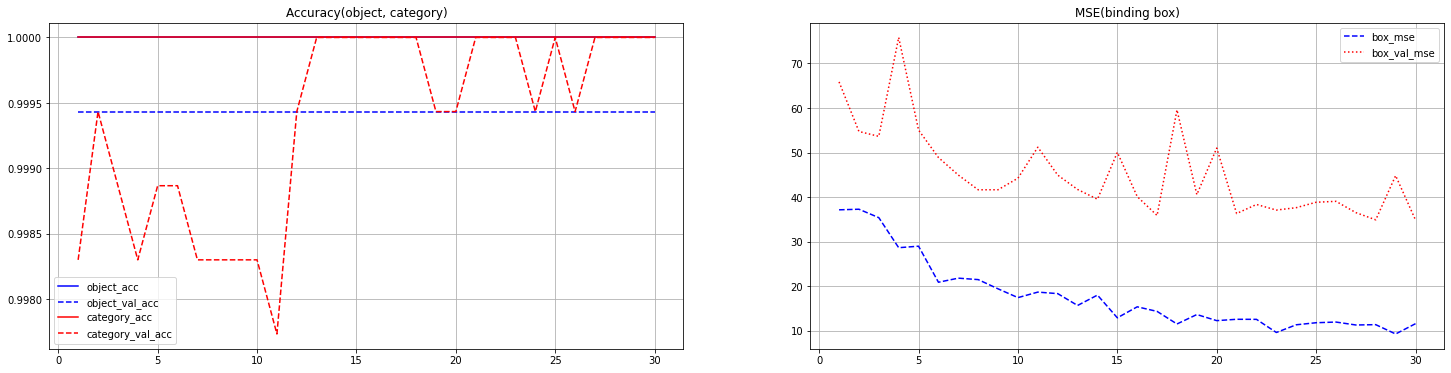

In [125]:
epochs = range(1, len(object_acc)+1)

plt.figure(figsize=(25, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_title('Accuracy(object, category)')
ax2.set_title('MSE(binding box)')
ax1.plot(epochs, object_acc, 'b', label='object_acc')
ax1.plot(epochs, object_val_acc, 'b--', label='object_val_acc')

ax1.plot(epochs, category_acc, 'r', label='category_acc')
ax1.plot(epochs, category_val_acc, 'r--', label='category_val_acc')

ax2.plot(epochs, box_mse, 'b--', label='box_mse')
ax2.plot(epochs, box_val_mse, 'r:', label='box_val_mse')

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.show()

In [120]:
pred = model.predict(x_ts)

56/56 [==============================] - 4s 63ms/step


In [130]:
pred

[array([[6.5409304e-06],
        [2.0150752e-12],
        [1.0000000e+00],
        ...,
        [1.0000000e+00],
        [1.0000000e+00],
        [1.0000000e+00]], dtype=float32),
 array([[  3.9422662,  13.525188 ,  11.355384 ,   6.222587 ],
        [ -6.5646   ,  -4.0771685,  -3.0003326,  -2.432418 ],
        [ 84.33743  , 117.94115  , 109.168106 , 103.04866  ],
        ...,
        [209.27682  , 189.68532  , 126.62595  ,  99.02229  ],
        [ 94.667816 , 100.076485 , 127.62311  , 118.42346  ],
        [131.22223  , 105.93265  , 100.78561  ,  90.02414  ]],
       dtype=float32),
 array([[1.0000000e+00, 3.5131244e-34, 0.0000000e+00, ..., 3.5372736e-13,
         3.8307732e-31, 3.1654564e-24],
        [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         4.2639981e-29, 0.0000000e+00],
        [5.8022388e-22, 9.6716591e-29, 0.0000000e+00, ..., 1.0278149e-23,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [3.9488362e-37, 6.9520372e-35, 1.0000000e+00, ..

In [121]:
y_test

,class,rec_width,rec_height,x,y,object
7495,0.0,0.0,0.0,0.0,0.0,0.0
8647,0.0,0.0,0.0,0.0,0.0,0.0
4209,9.0,93.0,122.0,112.0,109.0,1.0
870,2.0,186.0,144.0,115.0,72.0,1.0
6787,14.0,105.0,135.0,104.0,124.0,1.0
...,...,...,...,...,...,...
6576,14.0,153.0,147.0,108.0,128.0,1.0
3867,8.0,100.0,131.0,108.0,142.0,1.0
724,2.0,199.0,181.0,118.0,90.0,1.0
3029,7.0,109.0,102.0,126.0,118.0,1.0


In [122]:
print('객체유무:', pred[0][1699])
print('box:', pred[1][1699])
print('category:', pred[2][1699])

객체유무: [1.]
box: [221.03618  87.23898 109.7809  115.82384]
category: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [123]:
y_test.iloc[1699]

class           4.0
rec_width     217.0
rec_height     84.0
x             108.0
y             114.0
object          1.0
Name: 1607, dtype: float64

(-0.5, 158.5, 74.5, -0.5)

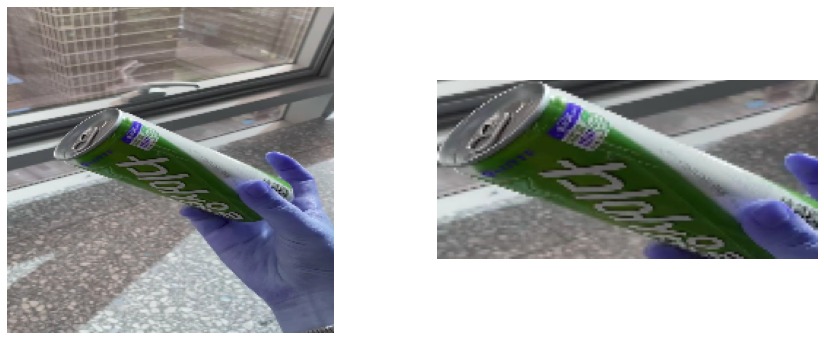

In [129]:
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(x_test[1705])
ax1.axis('off')

w, h, x, y= pred[1][1705][0], pred[1][1705][1], pred[1][1705][2], pred[1][1705][3]
ax2.imshow(x_test[1705][int(y - h / 2):int(y + h/2), int(x - w / 2):int(x + w/2)])
ax2.axis('off')

In [133]:
pred[2][1705]

array([4.2540603e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.4099519e-30, 0.0000000e+00, 1.0000000e+00,
       7.2059888e-34, 0.0000000e+00, 1.3047336e-30], dtype=float32)